In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random as random
from copy import deepcopy
from tqdm import tqdm
from random import randint
matplotlib.rc("font", family="KaiTi")
matplotlib.rcParams["axes.unicode_minus"] = False

In [21]:
def Collision(knight):
    opt_res = np.inf
    collision = [0] * len(knight)
    for k in range(len(knight)):
        for i in range(len(knight[0])):
            for j in range(len(knight[0])):
                if abs(knight[k][i]//8 - knight[k][j]//8) == 2 and abs(knight[k][i]% 8 -knight[k][j] %8) == 1:
                    collision[k] += 1
                elif abs(knight[k][i]//8 - knight[k][j]//8) == 1 and abs(knight[k][i]% 8 -knight[k][j] %8) == 2:
                    collision[k] += 1
                else:
                    pass
        collision[k] = collision[k] //2 
        if collision[k] <= opt_res:
            opt_res = collision[k]
            opt_index = k
    return(collision,opt_res,opt_index)

def precollision(knight):
    return(Collision(knight)[0][0])

In [22]:
#Figure out whether it is possible to compatiblize 9 knights on a 4x4 chessboard
T= 0
F= 0
for i1 in set(range(16)):
 for i2 in set(range(16))-set(range(i1+1)):
  for i3 in set(range(16))-set(range(i1+1))-set(range(i2+1)):
   for i4 in set(range(16))-set(range(i1+1))-set(range(i2+1))-set(range(i3+1)):
    for i5 in set(range(16))-set(range(i1+1))-set(range(i2+1))-set(range(i3+1))-set(range(i4+1)):
     for i6 in set(range(16))-set(range(i1+1))-set(range(i2+1))-set(range(i3+1))-set(range(i4+1))-set(range(i5+1)):
      for i7 in set(range(16))-set(range(i1+1))-set(range(i2+1))-set(range(i3+1))-set(range(i4+1))-set(range(i5+1))-set(range(i6+1)):
       for i8 in set(range(16))-set(range(i1+1))-set(range(i2+1))-set(range(i3+1))-set(range(i4+1))-set(range(i5+1))-set(range(i6+1))-set(range(i7+1)):
        for i9 in set(range(16))-set(range(i1+1))-set(range(i2+1))-set(range(i3+1))-set(range(i4+1))-set(range(i5+1))-set(range(i6+1))-set(range(i7+1))-set(range(i8+1)):
         if Collision([[i1,i2,i3,i4,i5,i6,i7,i8,i9]]) == 0:
          T = T + 1
         else:
          F = F + 1
print(T)
print(F)

0
11440


In [23]:
def Mini_Mutate(lst):
    R1 = random.randint(0, len(lst)-1)
    value_left = set(range(0,64)) - set(lst)
    R2 = random.randint(0, len(value_left) -1)
    lst[R1] = list(value_left)[R2]
    return(lst)

In [24]:
def norm_distance(a,b): #This is based on 0-63
    column_distance = abs(a // 8 - b // 8)
    row_distance = abs(a % 8 - b % 8)
    return((column_distance + row_distance)**2)

In [25]:
norm_distance(0,63)

196

In [26]:
def Knight_Swarm(n):
    knight = []
    for i in range(n):
        lst = list(range(64))
        random.shuffle(lst)
        knight.append(lst[0:32])
    return(knight)

In [27]:
#Initialization
N = 3000 # Number of Particles
I = 5000 # iterations

c1 = 0.1
c2 = 0.1
w = 1 - c1 - c2
#Metrics
avg = []
best = []
velocity = []
for i in range(N):
    lst = list(range(32))
    random.shuffle(lst)
    velocity.append(lst)
    
knights = Knight_Swarm(N)

fitness = []
opt_res = float('inf')
opt_index = -1

fitness, opt_res, opt_index = Collision(knights)
best.append(opt_res)
avg.append(np.mean(fitness))

print(avg)
print(best)

# pbest
pbest = deepcopy(knights)
gbest = deepcopy(knights[opt_index])
    
# iteration
for iterations in (range(I)):
    
    # Update velocity
    for i in range(N):
        for j in range(32):
            velocity[i][j] = abs(round(w * velocity[i][j] + c1 * np.random.rand() * norm_distance(pbest[i][j] , knights[i][j]) + c2 * np.random.rand() * norm_distance(gbest[j] , knights[i][j]), 2))
    
    ggbest = np.array(gbest)
    
    for i in tqdm(range(N)):
        knight = deepcopy(np.array(knights[i]))
        vel = np.array(velocity[i])
        mask = np.array(vel) < random.uniform(min(velocity[i]), max(velocity[i]))
        
        gbest_mask = ggbest[mask]
        vel_mask = vel[mask]
        knight_mask = knight[mask]
        seq = np.argsort(-vel_mask)
        
        for j in seq:
            if knight_mask[j] != gbest_mask[j]:
                pre = precollision([list(knight)])
                iq = np.where(knight == knight_mask[j])
                ib = np.where(knight == gbest_mask[j])
                if len(ib[0]) != 0:      
                    knight[iq], knight[ib] = knight[ib], knight[iq]
                
                else:
                    temp = knight[ib]
                    knight[iq] = gbest_mask[j]
                        
    #                   Before                After   
        if precollision([knights[i]]) >=  precollision([list(knight)]):          
            knights[i] = list(knight)  #To be the after one

        # Mutation
        Mutation = Mini_Mutate(knights[i])
        if precollision([Mutation]) < precollision([knights[i]]):
            knights[i] = deepcopy(Mutation)
        
               
        # Update pbest
        if precollision([knights[i]]) < fitness[i]:
            pbest[i] = deepcopy(knights[i])
            
               
    fitness, opt_res, opt_index = Collision(knights)
    avg.append(np.mean(fitness))
    best.append(opt_res)
    print(avg[-1])
    print(best[-1])
    
    if best[-1] == 0:
        break
        
    # Update gbest
    if opt_res <= precollision([gbest]):
        gbest = deepcopy(knights[opt_index])
    

[41.38033333333333]
[25]


100%|██████████| 3000/3000 [01:56<00:00, 25.81it/s]


38.090666666666664
20


100%|██████████| 3000/3000 [01:48<00:00, 27.73it/s]


35.075
18


100%|██████████| 3000/3000 [01:33<00:00, 31.99it/s]


32.04633333333334
11


100%|██████████| 3000/3000 [01:24<00:00, 35.30it/s]


27.609
9


100%|██████████| 3000/3000 [01:12<00:00, 41.22it/s]


24.056
7


100%|██████████| 3000/3000 [01:06<00:00, 45.02it/s]


21.372333333333334
6


100%|██████████| 3000/3000 [01:06<00:00, 45.09it/s]


19.423666666666666
5


100%|██████████| 3000/3000 [00:56<00:00, 53.54it/s]


17.613
3


100%|██████████| 3000/3000 [00:57<00:00, 52.09it/s]


15.872333333333334
2


100%|██████████| 3000/3000 [00:56<00:00, 53.49it/s]


14.386333333333333
1


100%|██████████| 3000/3000 [00:51<00:00, 58.47it/s]


13.257333333333333
1


100%|██████████| 3000/3000 [00:44<00:00, 67.74it/s]


12.709666666666667
0


In [28]:
avg

[41.38033333333333,
 38.090666666666664,
 35.075,
 32.04633333333334,
 27.609,
 24.056,
 21.372333333333334,
 19.423666666666666,
 17.613,
 15.872333333333334,
 14.386333333333333,
 13.257333333333333,
 12.709666666666667]

In [29]:
for queen, fit, vel in zip(knights, fitness, velocity):
    print(knight, ', fitness = ', fit, ', velocity = ', vel)
print('Final gbest = ', gbest)

[22 18 25 34 61 54 38 36  0 43  2 41 11 45 57  9 15 59  4 48 58 63 20 27
 50 16 52  6 47 32 31 29] , fitness =  10 , velocity =  [6.28, 2.02, 1.84, 1.01, 8.61, 2.26, 0.95, 6.19, 7.96, 9.78, 3.21, 10.86, 4.33, 0.58, 5.54, 1.39, 1.42, 8.18, 1.94, 2.24, 29.19, 1.81, 0.63, 3.86, 1.88, 0.27, 1.32, 2.56, 1.34, 0.14, 2.03, 12.39]
[22 18 25 34 61 54 38 36  0 43  2 41 11 45 57  9 15 59  4 48 58 63 20 27
 50 16 52  6 47 32 31 29] , fitness =  18 , velocity =  [7.08, 5.18, 13.61, 2.96, 3.46, 1.38, 1.79, 2.45, 10.0, 8.28, 1.59, 1.24, 8.35, 2.5, 3.17, 0.36, 0.74, 5.28, 1.86, 3.16, 6.7, 1.35, 3.28, 0.82, 7.27, 2.57, 1.19, 1.45, 0.58, 2.02, 10.55, 12.68]
[22 18 25 34 61 54 38 36  0 43  2 41 11 45 57  9 15 59  4 48 58 63 20 27
 50 16 52  6 47 32 31 29] , fitness =  24 , velocity =  [8.91, 4.11, 2.4, 2.86, 3.09, 1.47, 1.62, 12.38, 10.27, 14.12, 2.24, 6.74, 4.6, 2.03, 2.64, 14.96, 3.47, 5.56, 0.28, 1.33, 4.52, 3.92, 1.06, 1.43, 7.76, 13.5, 2.1, 3.65, 0.5, 1.29, 1.2, 10.67]
[22 18 25 34 61 54 38 36  0 43

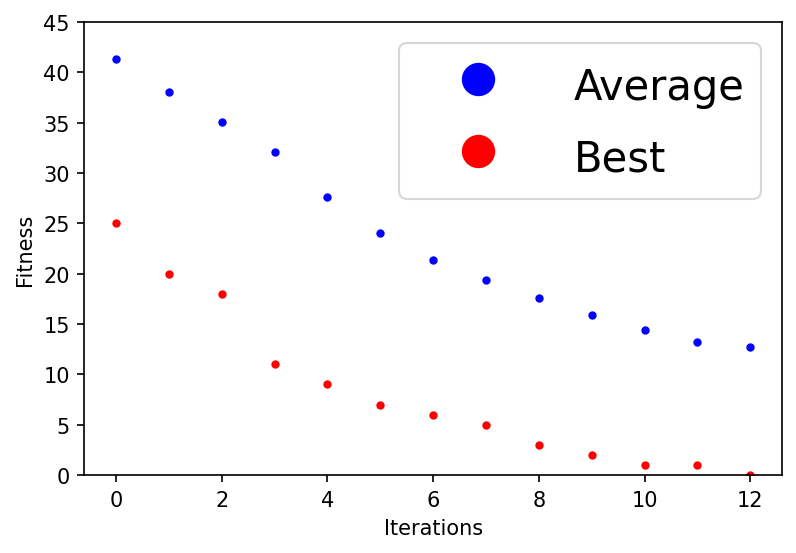

In [30]:
plt.figure(dpi = 150)
plt.plot(np.arange(len(avg)), avg, 'b.')
plt.plot(np.arange(len(best)), best, 'r.')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.ylim([0,45])
plt.legend(['Average', 'Best'], fontsize = 20, markerscale = 5, handlelength =3,handleheight = 1.5)

In [31]:
#The final solution
np.reshape(gbest,[1,-1])

array([[22, 18, 25, 34, 61, 54, 38, 36,  0, 43,  2, 41, 11, 45, 57,  9,
        15, 59,  4, 48,  7, 63, 20, 27, 50, 16, 52,  6, 47, 32, 31, 29]])